<a href="https://colab.research.google.com/github/krissrj/ciencia-de-datos/blob/main/ExamenCcsDeDatosParaLaEconomia_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

drive.mount('/content/drive')
# Use pd.read_csv with the appropriate delimiter instead of pd.read_txt
# Assuming tab delimiter based on the file path
df = pd.read_csv('/content/drive/MyDrive/Solemne 2 CDPE/ingresos-1.txt', delimiter='\t')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
df


,estatura,peso,genero,ingresos,etnia,educacion,educacion_madre,educacion_padre,camina,ejercicio,fumador,tenso,malhumorado,edad
0,187.96,95.25,masculino,50000.0,Blanco,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,167.64,56.70,femenino,60000.0,Blanco,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,162.56,57.15,femenino,30000.0,Blanco,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,165.10,90.72,femenino,25000.0,Blanco,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,160.02,49.90,femenino,50000.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,154.94,54.43,femenino,15000.0,Blanco,18.0,18.0,18.0,6,1,2.0,0.0,0.0,82
1812,162.56,58.97,femenino,8000.0,Blanco,12.0,12.0,12.0,1,1,1.0,7.0,7.0,33
1813,182.88,88.00,masculino,60000.0,Blanco,12.0,12.0,12.0,2,1,2.0,0.0,0.0,50
1814,160.02,70.31,femenino,15000.0,Other,14.0,14.0,14.0,6,1,2.0,2.0,2.0,69


In [ ]:
# Load the file using the full path from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Solemne 2 CDPE/ingresos-1.txt', delimiter='\t')

# Revisión de las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

Primeras filas del dataset:
   estatura   peso     genero  ingresos   etnia  educacion  educacion_madre  \
0    187.96  95.25  masculino   50000.0  Blanco       16.0             16.0   
1    167.64  56.70   femenino   60000.0  Blanco       16.0             16.0   
2    162.56  57.15   femenino   30000.0  Blanco       16.0             16.0   
3    165.10  90.72   femenino   25000.0  Blanco       17.0             17.0   
4    160.02  49.90   femenino   50000.0   Other       16.0             16.0   

   educacion_padre  camina  ejercicio  fumador  tenso  malhumorado  edad  
0             16.0       3          3      2.0    0.0          0.0    45  
1             16.0       6          5      1.0    0.0          0.0    58  
2             16.0       8          1      2.0    1.0          1.0    29  
3              NaN       8          1      2.0    0.0          0.0    57  
4             16.0       5          6      2.0    0.0          0.0    91  

Información general del dataset:
<class 'panda

Primeras filas del dataset:
El dataset contiene 1.816 entradas con 14 columnas. Las primeras filas muestran información variada, con variables como características demográficas (estatura, peso, género, edad), educación (nivel educativo de los encuestados y de sus padres), y comportamientos relacionados con la salud y el estilo de vida (ejercicio, fumar, caminar al trabajo, niveles de estrés y mal humor).

Estatura: Varía entre valores cercanos a los 160 cm y 190 cm.
Peso: En su mayoría entre 50 y 100 kg, con un rango más amplio en la fila de ejemplo (49.9 kg a 95.25 kg).
Género: Está claramente indicado como "masculino" o "femenino".
Ingresos: Rango entre 25,000 y 60,000 dólares en las primeras filas, aunque con algunos valores extremos.
Etnia: Variedad de categorías (Blanco, Other), aunque en la muestra proporcionada predomina la etnia "Blanco".
Educación: Los años de educación alcanzan hasta 18 años.
Educación de los padres: Varía entre 3 y 99 años, lo que indica que algunos encuestados pueden haber señalado datos no válidos o incorrectos.
Caminar al trabajo: Los valores oscilan entre 1 (nunca) y 8 (todos los días).
Ejercicio: Varía entre 1 y 7 días a la semana.
Fumador: Es un valor binario (1 para "sí", 2 para "no").
Tenso y malhumorado: Son valores enteros que indican cuántos días a la semana se siente tenso o malhumorado.
Edad: Varía entre 18 y 91 años.
Información General del Dataset:
El conjunto de datos tiene 1.816 filas y 14 columnas. Hay algunos valores nulos, especialmente en las columnas de educación de los padres y las variables relacionadas con el comportamiento (fumador, tenso, malhumorado). Las columnas de peso, educación, educación_madre, educación_padre, fumador, tenso, malhumorado y edad tienen algunos valores nulos, lo cual se debe manejar durante el preprocesamiento.

Resumen Estadístico:
Estatura: Promedio de 169 cm, con un rango entre 144.78 cm y 208.28 cm, lo que indica que hay algunas personas muy altas y otras más bajas, pero la mayoría se encuentra cerca de los 167-175 cm.
Peso: Promedio de 70.9 kg, con una desviación estándar significativa de 15.7 kg. Los valores oscilan entre 36.29 kg y 155.13 kg.
Ingresos: Promedio de $21,147, pero con una desviación estándar bastante alta de $22,531, lo que indica una gran variabilidad en los ingresos (rango de 0 a 400,000 dólares).
Educación: Promedio de 13.24 años, lo que sugiere que la mayoría de los encuestados tienen una educación secundaria o universitaria.
Educación de los padres: El promedio de 13.6 años de educación sugiere que muchos padres tienen al menos educación secundaria.
Caminar al trabajo: La mayoría de las personas caminan entre 3 y 6 días a la semana, con un promedio de 5.3 días.
Ejercicio: Promedio de 3 días a la semana, con un rango de 1 a 7 días.
Fumador: La mayoría no fuma regularmente (valor 2), con un pequeño porcentaje fumando 7 o más cigarros a la semana.
Tenso y malhumorado: En promedio, los encuestados no experimentan tensión o mal humor con frecuencia. Los valores de estas columnas varían de 0 a 7 días.
Edad: Promedio de 42.93 años, con un rango que va desde los 18 hasta los 91 años, lo que indica una muestra diversa en términos de edad.
Valores Nulos:
Peso: Tiene 27 valores nulos.
Educación: 2 valores nulos.
Educación Madre: 244 valores nulos.
Educación Padre: 295 valores nulos.
Fumador, Tenso, Malhumorado: Todos tienen un valor nulo (1).
Esto implica que el dataset debe ser limpiado adecuadamente antes de continuar con el análisis o modelado. Se pueden usar técnicas de imputación o eliminar las filas con valores nulos dependiendo del enfoque.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estatura         1816 non-null   float64
 1   peso             1789 non-null   float64
 2   genero           1816 non-null   object 
 3   ingresos         1816 non-null   float64
 4   etnia            1816 non-null   object 
 5   educacion        1814 non-null   float64
 6   educacion_madre  1572 non-null   float64
 7   educacion_padre  1521 non-null   float64
 8   camina           1816 non-null   int64  
 9   ejercicio        1816 non-null   int64  
 10  fumador          1815 non-null   float64
 11  tenso            1815 non-null   float64
 12  malhumorado      1815 non-null   float64
 13  edad             1816 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 198.8+ KB
None
          estatura         peso       ingresos    educacion  educacion_madre  \
count  1

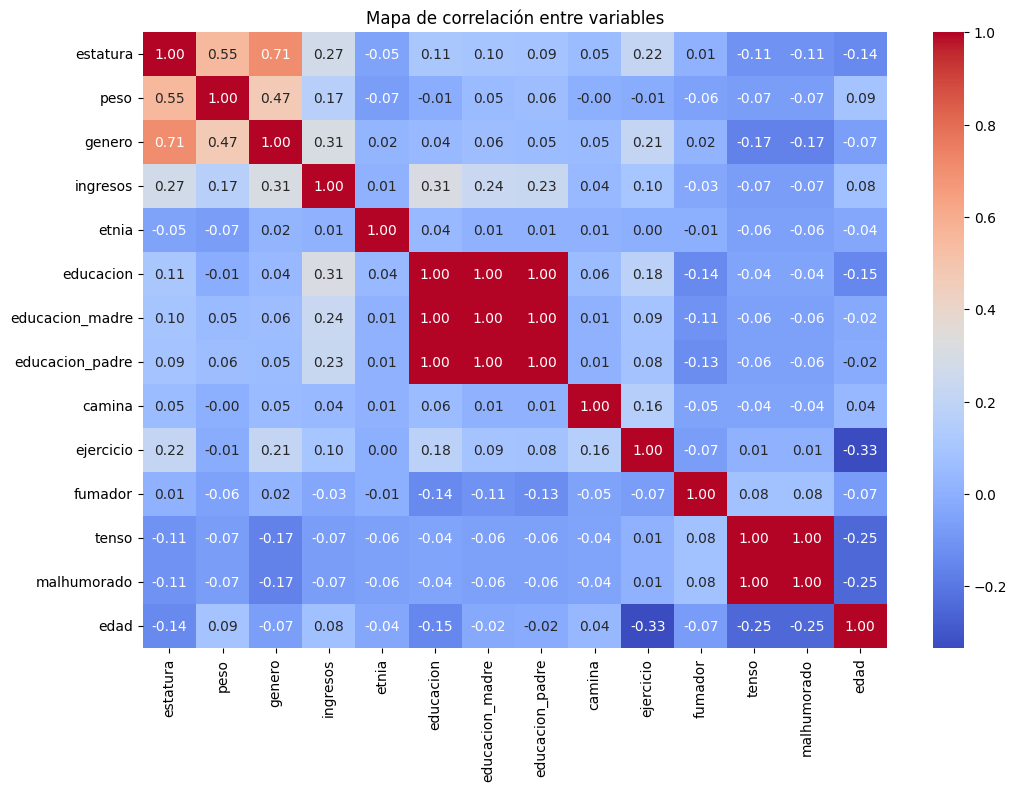

In [ ]:
# Resumen general
print(df.info())
print(df.describe())

# Identificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Codificación de variables categóricas (genero, etnia, camina, fumador)
df["genero"] = df["genero"].astype("category").cat.codes
df["etnia"] = df["etnia"].astype("category").cat.codes
df["camina"] = df["camina"].astype("category").cat.codes
df["fumador"] = df["fumador"].map({1: 1, 2: 0})  # Mapear 1: Sí, 2: No a 1/0

# Visualización inicial de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlación entre variables")
plt.show()

Información general:
El dataset tiene un total de 1816 filas y 14 columnas. Los tipos de datos incluyen:

9 columnas de tipo float64 (variables continuas como estatura, peso, ingresos, etc.)
3 columnas de tipo int64 (variables discretas como camina, ejercicio, edad)
2 columnas de tipo object (variables categóricas como género y etnia).
En términos de memoria, el dataset ocupa alrededor de 198.8 KB.

Resumen Estadístico:
Estatura:

Promedio: 169.08 cm
Rango: De 144.78 cm a 208.28 cm.
Desviación estándar: 9.73 cm.
La mayoría de las personas se encuentran entre 162.56 cm y 175.90 cm.
Peso:

Promedio: 70.90 kg
Rango: De 36.29 kg a 155.13 kg.
Desviación estándar: 15.70 kg.
Este valor indica una considerable variabilidad en el peso de los individuos.
Ingresos:

Promedio: 21,147.30 unidades monetarias.
Rango: De 0 a 400,000 unidades monetarias.
Desviación estándar: 22,531.77.
Los ingresos tienen una gran dispersión, con algunos valores muy bajos y otros muy altos.
Educación:

Promedio: 13.24 años
Rango: De 2 a 18 años de educación.
Desviación estándar: 2.56 años.
Este valor sugiere que la mayoría de las personas han alcanzado educación secundaria o terciaria.
Educación de la madre:

Promedio: 13.61 años.
Rango: De 3 a 99 años (el valor de 99 puede ser un error).
Desviación estándar: 3.22 años.
Esto indica que, en promedio, las madres de los encuestados tienen una educación similar a la de los propios encuestados.
Educación del padre:

Promedio: 13.65 años.
Rango: De 3 a 99 años.
Desviación estándar: 3.25 años.
Los padres tienen niveles educativos similares a los de las madres.
Caminar al trabajo:

Promedio: 5.30 días a la semana.
Rango: De 1 a 8 días (lo cual sugiere que algunas personas caminan todos los días, y otras no caminan nunca).
Ejercicio:

Promedio: 3.05 días a la semana.
Rango: De 1 a 7 días.
Fumador:

Promedio: 1.75, lo que indica que la mayoría de los encuestados no son fumadores.
Rango: 1 a 2, con 1 representando "no fumador" y 2 "fumador".
Tenso:

Promedio: 1.42, lo que sugiere que la mayoría no experimenta tensión frecuente.
Rango: 0 a 7 días de la semana.
Malhumorado:

Promedio: 1.42, similar a la tensión, indicando una prevalencia baja de mal humor frecuente.
Rango: 0 a 7 días de la semana.
Edad:

Promedio: 42.93 años.
Rango: De 18 a 91 años.
La muestra cubre un amplio rango de edades, con la mayoría entre 29 y 56 años.
Valores Faltantes:
Peso tiene 27 valores nulos.
Educación tiene 2 valores nulos.
Educación de la madre tiene 244 valores nulos.
Educación del padre tiene 295 valores nulos.
Fumador, Tenso y Malhumorado tienen 1 valor nulo cada uno.
Esto significa que algunas columnas tienen datos faltantes que deben ser manejados antes de realizar cualquier análisis o modelado. Las técnicas comunes para tratar los valores nulos incluyen la imputación (media, mediana, valores más frecuentes) o eliminar las filas o columnas con valores nulos, dependiendo de la cantidad de datos faltantes y su impacto en el análisis.








In [ ]:
# Dividir variables predictoras (X) y objetivo (y)
X = df.drop(columns=["ingresos"])
y = df["ingresos"]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")

Forma de X_train: (1452, 13), y_train: (1452,)


In [ ]:
# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Verificar si hay valores faltantes
print(df_clean.isnull().sum())

# Separar nuevamente las variables predictoras y objetivo
X_clean = df_clean.drop(columns=["ingresos"])
y_clean = df_clean["ingresos"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


estatura           0
peso               0
genero             0
ingresos           0
etnia              0
educacion          0
educacion_madre    0
educacion_padre    0
camina             0
ejercicio          0
fumador            0
tenso              0
malhumorado        0
edad               0
dtype: int64


In [ ]:
# Rellenar valores faltantes con la media de cada columna
df_filled = df.fillna(df.mean())

# Verificar si hay valores faltantes
print(df_filled.isnull().sum())

# Separar las variables predictoras y objetivo
X_filled = df_filled.drop(columns=["ingresos"])
y_filled = df_filled["ingresos"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42)


estatura           0
peso               0
genero             0
ingresos           0
etnia              0
educacion          0
educacion_madre    0
educacion_padre    0
camina             0
ejercicio          0
fumador            0
tenso              0
malhumorado        0
edad               0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes (rellenar con la media por defecto)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)  # Ajustar y transformar las variables predictoras
y_imputed = y  # No imputamos 'y', solo las características (X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)



Modelo: Regresión Lineal
MSE: 214555155.40, MAE: 10816.85, R²: 0.22

Modelo: Árbol de Decisión
MSE: 496229220.68, MAE: 15058.87, R²: -0.80

Modelo: Random Forest
MSE: 247465343.95, MAE: 11238.65, R²: 0.10

Modelo: Gradient Boosting
MSE: 211679956.27, MAE: 10530.95, R²: 0.23

Modelo: KNN
MSE: 307811958.19, MAE: 11987.20, R²: -0.12

Comparación de Modelos:
                            MSE           MAE        R²
Regresión Lineal   2.145552e+08  10816.846557  0.222091
Árbol de Decisión  4.962292e+08  15058.865385 -0.799170
Random Forest      2.474653e+08  11238.650604  0.102769
Gradient Boosting  2.116800e+08  10530.949261  0.232515
KNN                3.078120e+08  11987.195055 -0.116029


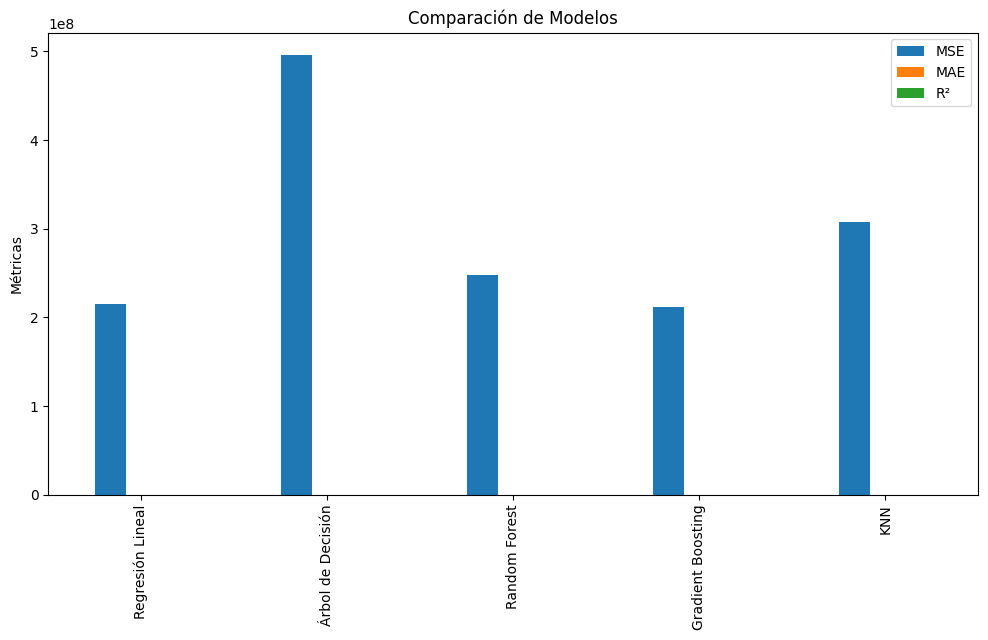

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Import necessary modules from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lista de modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

# Diccionario para almacenar resultados
resultados = {}

# Entrenamiento y evaluación de modelos
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[nombre] = {"MSE": mse, "MAE": mae, "R²": r2}
    print(f"\nModelo: {nombre}")
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Comparación de resultados
resultados_df = pd.DataFrame(resultados).T
print("\nComparación de Modelos:")
print(resultados_df)

# Gráfica comparativa
resultados_df.plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Modelos")
plt.ylabel("Métricas")
plt.show()

Descripción de los Resultados de los Modelos
1. Regresión Lineal:
MSE (Error Cuadrático Medio): 214,555,155.40
El MSE mide la diferencia cuadrada promedio entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo. En este caso, el valor es moderado, sugiriendo que la regresión lineal tiene un ajuste decente pero no perfecto.
MAE (Error Absoluto Medio): 10,816.85
El MAE es una medida de la media de los errores absolutos, es decir, las diferencias entre los valores predichos y los reales sin considerar la dirección del error. Un MAE de aproximadamente 10,817 es relativamente grande, indicando que las predicciones tienen un error considerable.
R² (Coeficiente de Determinación): 0.22
El R² indica qué proporción de la varianza de los datos es explicada por el modelo. Un R² de 0.22 significa que solo el 22% de la variabilidad en los ingresos es explicada por el modelo, lo que sugiere un bajo poder predictivo.
2. Árbol de Decisión:
MSE: 496,229,220.68
El MSE es significativamente más alto que el de la regresión lineal, lo que indica que el árbol de decisión tiene un rendimiento peor en términos de error cuadrático medio.
MAE: 15,058.87
El MAE también es considerablemente mayor, lo que significa que el árbol de decisión presenta un mayor error en las predicciones.
R²: -0.80
Un R² negativo sugiere que el modelo no está haciendo un buen trabajo en la predicción, ya que es peor que simplemente predecir la media de los ingresos. Esto puede indicar que el árbol de decisión está sobreajustado o mal calibrado.
3. Random Forest:
MSE: 247,465,343.95
El MSE es menor que el del árbol de decisión, lo que indica que Random Forest tiene un mejor ajuste en comparación con el árbol de decisión.
MAE: 11,238.65
El MAE es más bajo que el de los árboles de decisión, lo que sugiere que Random Forest tiene un rendimiento más fiable.
R²: 0.10
Aunque es mayor que el R² de la regresión lineal y el árbol de decisión, un R² de 0.10 sigue indicando que el modelo explica solo un 10% de la variabilidad en los ingresos, lo cual es un valor bajo.
4. Gradient Boosting:
MSE: 211,679,956.27
El MSE de Gradient Boosting es el más bajo entre todos los modelos, lo que sugiere que tiene el mejor ajuste y menor error cuadrático en comparación con los demás modelos.
MAE: 10,530.95
Similar al MSE, el MAE de Gradient Boosting es el más bajo, indicando que este modelo tiene el menor error absoluto promedio.
R²: 0.23
El R² más alto entre todos los modelos. Aunque sigue siendo bajo, indica que este modelo es el que mejor explica la variabilidad en los ingresos (23%).
5. KNN (K-Nearest Neighbors):
MSE: 307,811,958.19
El MSE de KNN es mayor que el de la regresión lineal y el Random Forest, lo que sugiere que este modelo no se ajusta tan bien a los datos.
MAE: 11,987.20
El MAE es el más alto entre los modelos, lo que indica que KNN tiene un error relativamente alto en sus predicciones.
R²: -0.12
Un R² negativo también indica un mal desempeño del modelo, ya que KNN no logra explicar adecuadamente la variabilidad en los ingresos.





Conclusiones:
Mejor desempeño: Gradient Boosting tiene el menor MSE, el menor MAE y el mayor R², por lo que es el modelo con mejor rendimiento general.
Peor desempeño: Árbol de Decisión y KNN presentan los peores resultados, con valores negativos en R², lo que sugiere un rendimiento muy pobre.
Modelos intermedios: Regresión Lineal y Random Forest muestran resultados decentes, con un R² moderado y un error no demasiado alto, pero sin un poder predictivo fuerte.





